In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f_o=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_12h_orcinus/SalishSea_1h_20151208_20151208_grid_T.nc')
fb_o=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_12h_orcinus/SalishSea_1h_20151208_20151208_ptrc_T.nc')
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_12h/SalishSea_1h_20151208_20151208_grid_T.nc')
fb=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_12h/SalishSea_1h_20151208_20151208_ptrc_T.nc')
fkeys=fb.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t,-z[:])
xt,yt=np.meshgrid(lons,lats)
x0,y0=np.meshgrid(lons,lats)

fm=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_full_01/mesh_mask.nc')
mesh=fm.variables['tmask'][:,:,:,:]

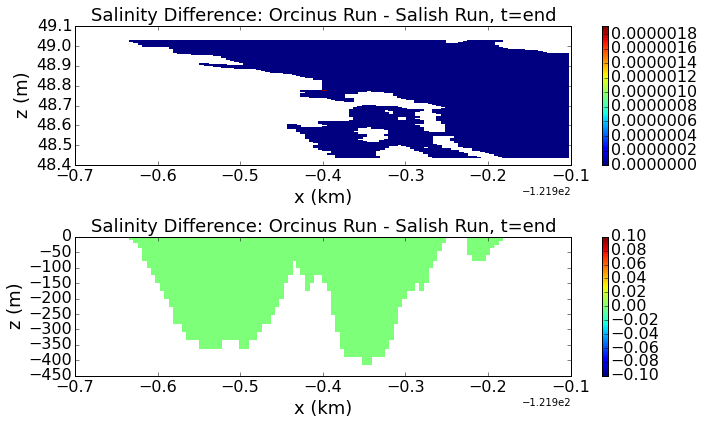

In [4]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(x0[400:550,160:270],y0[400:550,160:270],
                        np.ma.masked_where(mesh[0,0,400:550,160:270]==0,
                        f_o.variables['vosaline'][-1,0,400:550,160:270]-f.variables['vosaline'][-1,0,400:550,160:270]))
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity Difference: Orcinus Run - Salish Run, t=end', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -400, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx[:,160:270],zz[:,160:270],
                        np.ma.masked_where(mesh[0,:,550,160:270]==0,f_o.variables['vosaline'][-1,:,550,160:270]-f.variables['vosaline'][-1,:,550,160:270]))
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity Difference: Orcinus Run - Salish Run, t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -400, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

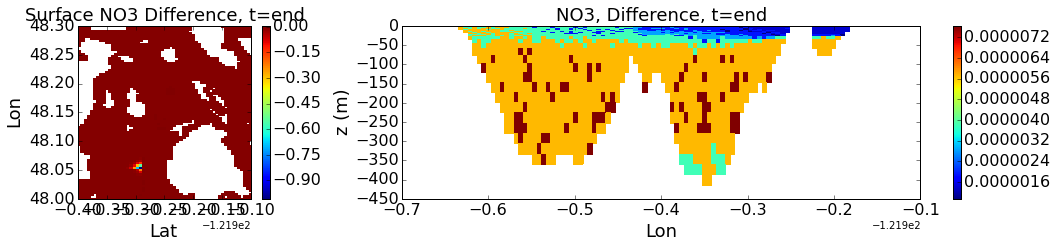

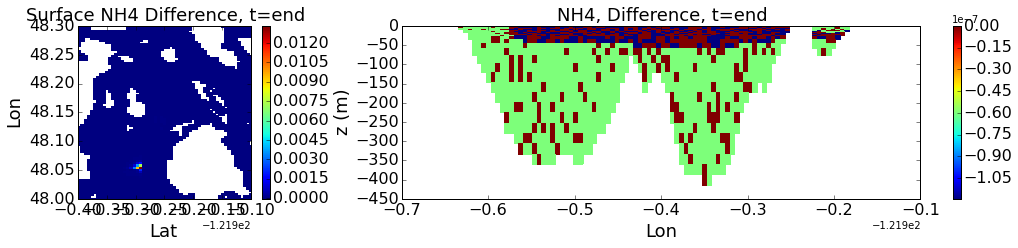

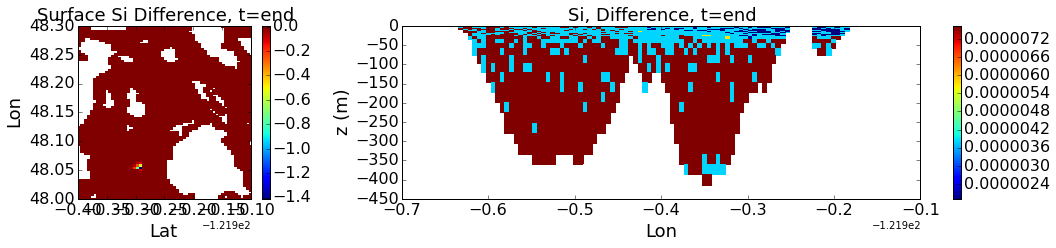

In [6]:
for ik in fkeys:
    if np.size(fb.variables[ik].shape) == 4:
        fig = plt.figure(figsize=(15,3))
        axs=fig.add_axes([.1, .1, .2, .8])
        mesh0=axs.pcolormesh(x0,y0,
                             np.ma.masked_where(mesh[0,0,:,:]==0,fb_o.variables[ik][-1,0,:,:]-fb.variables[ik][-1,0,:,:]))
        cb0=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('Lon', fontsize=18)
        axs.set_xlabel('Lat', fontsize=18)
        axs.set_title('Surface ' + ik + ' Difference, t=end', fontsize=18)
        #axs.autoscale(tight='True')
        axs.axis([lons[0], lons[-1], lats[0], lats[-1]])
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        axs.axis([-122.3, -122.0, 48, 48.3])
        
        axs1=fig.add_axes([.4, .1, .6, .8])
        mesh1=axs1.pcolormesh(xx[:,160:270],zz[:,160:270],
                              np.ma.masked_where(mesh[0,:,550,160:270]==0,fb_o.variables[ik][-1,:,550,160:270]-fb.variables[ik][-1,:,550,160:270]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))[0,:,350,0:50]
        cb1=fig.colorbar(mesh1,ax=axs1)
        axs1.set_ylabel('z (m)', fontsize=18)
        axs1.set_xlabel('Lon', fontsize=18)
        axs1.set_title(ik + ', Difference, t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs1.get_xticklabels(),fontsize=16)
        plt.setp(axs1.get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)


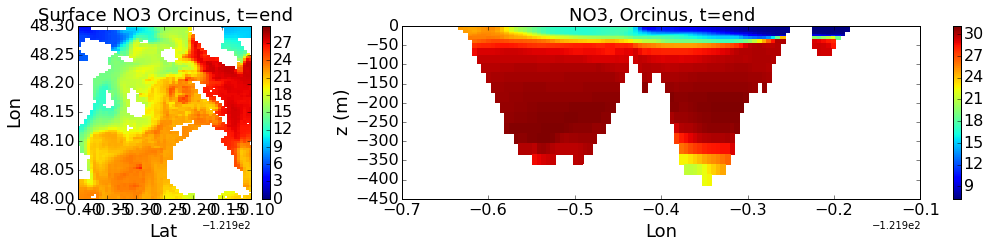

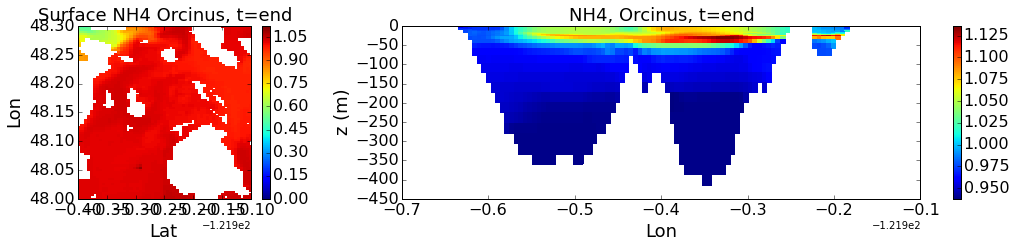

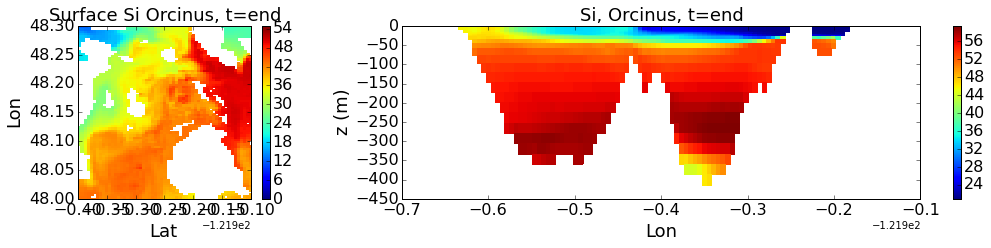

In [7]:
for ik in fkeys:
    if np.size(fb.variables[ik].shape) == 4:
        fig = plt.figure(figsize=(15,3))
        axs=fig.add_axes([.1, .1, .2, .8])
        mesh0=axs.pcolormesh(x0,y0,
                             np.ma.masked_where(mesh[0,0,:,:]==0,fb_o.variables[ik][-1,0,:,:]))
        cb0=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('Lon', fontsize=18)
        axs.set_xlabel('Lat', fontsize=18)
        axs.set_title('Surface ' + ik + ' Orcinus, t=end', fontsize=18)
        #axs.autoscale(tight='True')
        axs.axis([lons[0], lons[-1], lats[0], lats[-1]])
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        axs.axis([-122.3, -122.0, 48, 48.3])
        
        axs1=fig.add_axes([.4, .1, .6, .8])
        mesh1=axs1.pcolormesh(xx[:,160:270],zz[:,160:270],
                              np.ma.masked_where(mesh[0,:,550,160:270]==0,fb_o.variables[ik][-1,:,550,160:270]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))[0,:,350,0:50]
        cb1=fig.colorbar(mesh1,ax=axs1)
        axs1.set_ylabel('z (m)', fontsize=18)
        axs1.set_xlabel('Lon', fontsize=18)
        axs1.set_title(ik + ', Orcinus, t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs1.get_xticklabels(),fontsize=16)
        plt.setp(axs1.get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
